# [과제 2] 회귀분석
### - Ch 1, Ch 2를 토대로 자유롭게 회귀분석과 회귀진단을 진행해주세요.
### - 주석으로 설명 및 근거 자세하게 달아주시면 감사하겠습니다. :)

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='ignore')

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

plt.rc("font", family="AppleGothic")
plt.rc("axes", unicode_minus=False)

# Data 

데이터 출처 : https://www.kaggle.com/avikasliwal/used-cars-price-prediction 

< y > 
* **Price** : The price of the used car in INR Lakhs.



< X > 
* Name : The brand and model of the car
* Location : The location in which the car is being sold or is available for purchase.
* Year : The year or edition of the model.
* Kilometers_Driven : The total kilometres driven in the car by the previous owner(s) in KM.
* Fuel_Type : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
* Transmission : The type of transmission used by the car. (Automatic / Manual)
* Owner_Type : Whether the ownership is Firsthand, Second hand or other.
* Mileage : The standard mileage offered by the car company in kmpl or km/kg
* Engine : The displacement volume of the engine in CC.
* Power : The maximum power of the engine in bhp.
* Seats : The number of seats in the car.
* New_Price : The price of a new car of the same model.

In [2]:
# Load Data 
data = pd.read_csv("assignment2_data.csv", index_col=0)
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
data.info() # data type 및 결측치 수 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  New_Price          824 non-null    object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 658.3+ KB


### Preprocessing

In [4]:
data["Mileage"] = data["Mileage"].map(lambda x: float(str(x).split()[0]) 
                                      if str(x).split()[-1]=="kmpl" else float(str(x).split()[0])*0.91) # 마일리지를 kmpl로 통일하고 단위 제거
data["Engine"] = data["Engine"].map(lambda x: float(str(x).split()[0])) # 단위 제거
data["Power"] = data["Power"].map(lambda x: float(str(x).split()[0]) if str(x).split()[0]!='null' else float('nan')) # 단위 제거

In [5]:
data["Transmission"] = data["Transmission"].map(lambda x: 1 if x=="Automatic" else 0) # 자동방식이면 1, 아니면 0으로 binary encoding

In [6]:
# 결측치 처리
data["Mileage"] = data["Mileage"].fillna(data["Mileage"].mean())
data["Engine"] = data["Engine"].fillna(data["Engine"].mean())
data["Power"] = data["Power"].fillna(data["Power"].mean())
data["Seats"] = data["Seats"].fillna(data["Seats"].mean())

In [7]:
# 수치형 변수만 활용해 회귀 모형 학습
X_numeric = data[["Year", "Kilometers_Driven", "Transmission", "Mileage", "Engine", "Power", "Seats"]]
y = data["Price"]

In [8]:
X_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               6019 non-null   int64  
 1   Kilometers_Driven  6019 non-null   int64  
 2   Transmission       6019 non-null   int64  
 3   Mileage            6019 non-null   float64
 4   Engine             6019 non-null   float64
 5   Power              6019 non-null   float64
 6   Seats              6019 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 376.2 KB


### Fitting

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()
model.fit(X_numeric,y)

LinearRegression()

In [11]:
error = y-model.predict(X_numeric)

### 선형성 검증

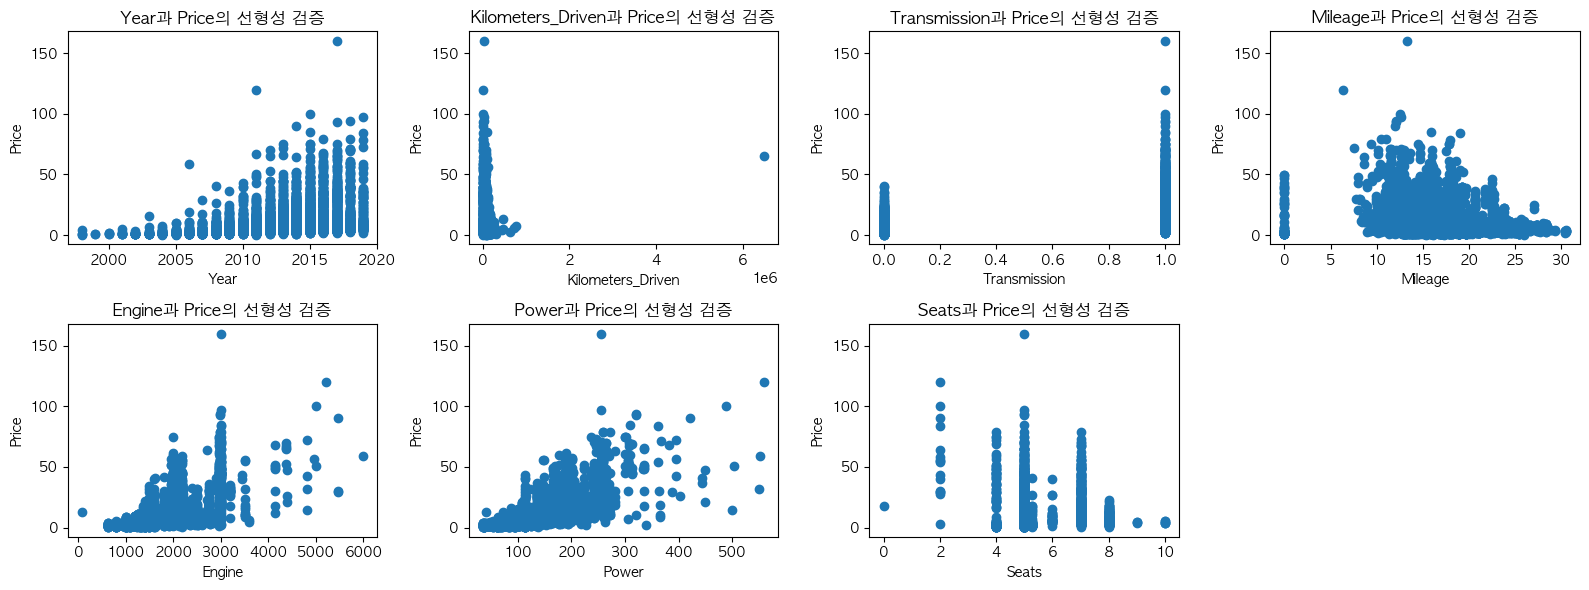

In [20]:
fig, axes = plt.subplots(2, 4, figsize=(16,6))
for idx, col in enumerate(X_numeric.columns):
    axes[idx//4, idx%4].scatter(X_numeric[col], y)
    axes[idx//4, idx%4].set_title(f"{col}과 Price의 선형성 검증")
    axes[idx//4, idx%4].set_xlabel(col)
    axes[idx//4, idx%4].set_ylabel("Price")
axes[1,3].axis("off")
plt.tight_layout()
plt.show()

- Scatter Plot을 활용해 변수와 target 간의 선형성 검증
  - 모든 변수가 선형성을 보유하고 있다고 보기 어렵다.
  - 그 중에서 Engine과 Power가 가장 선형성이 존재한다.

### 정규성 검증

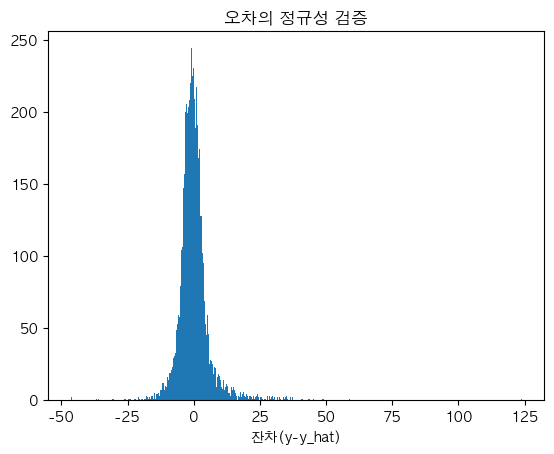

In [25]:
plt.hist(error, bins=500)
plt.title("오차의 정규성 검증")
plt.xlabel("잔차(y-y_hat)")
plt.show()

- 오차가 종모양의 형태를 띈다.
  - 정규성 존재

### 등분산성 검증

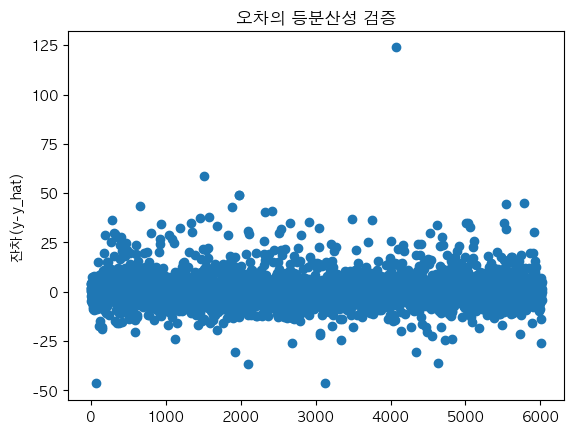

In [19]:
plt.scatter(error.index, error)
plt.title("오차의 등분산성 검증")
plt.ylabel("잔차(y-y_hat)")
plt.show()

- 약간의 이상치를 제외하고는 대부분 등분산성을 띈다고 볼 수 있다.

### 독립성 검증

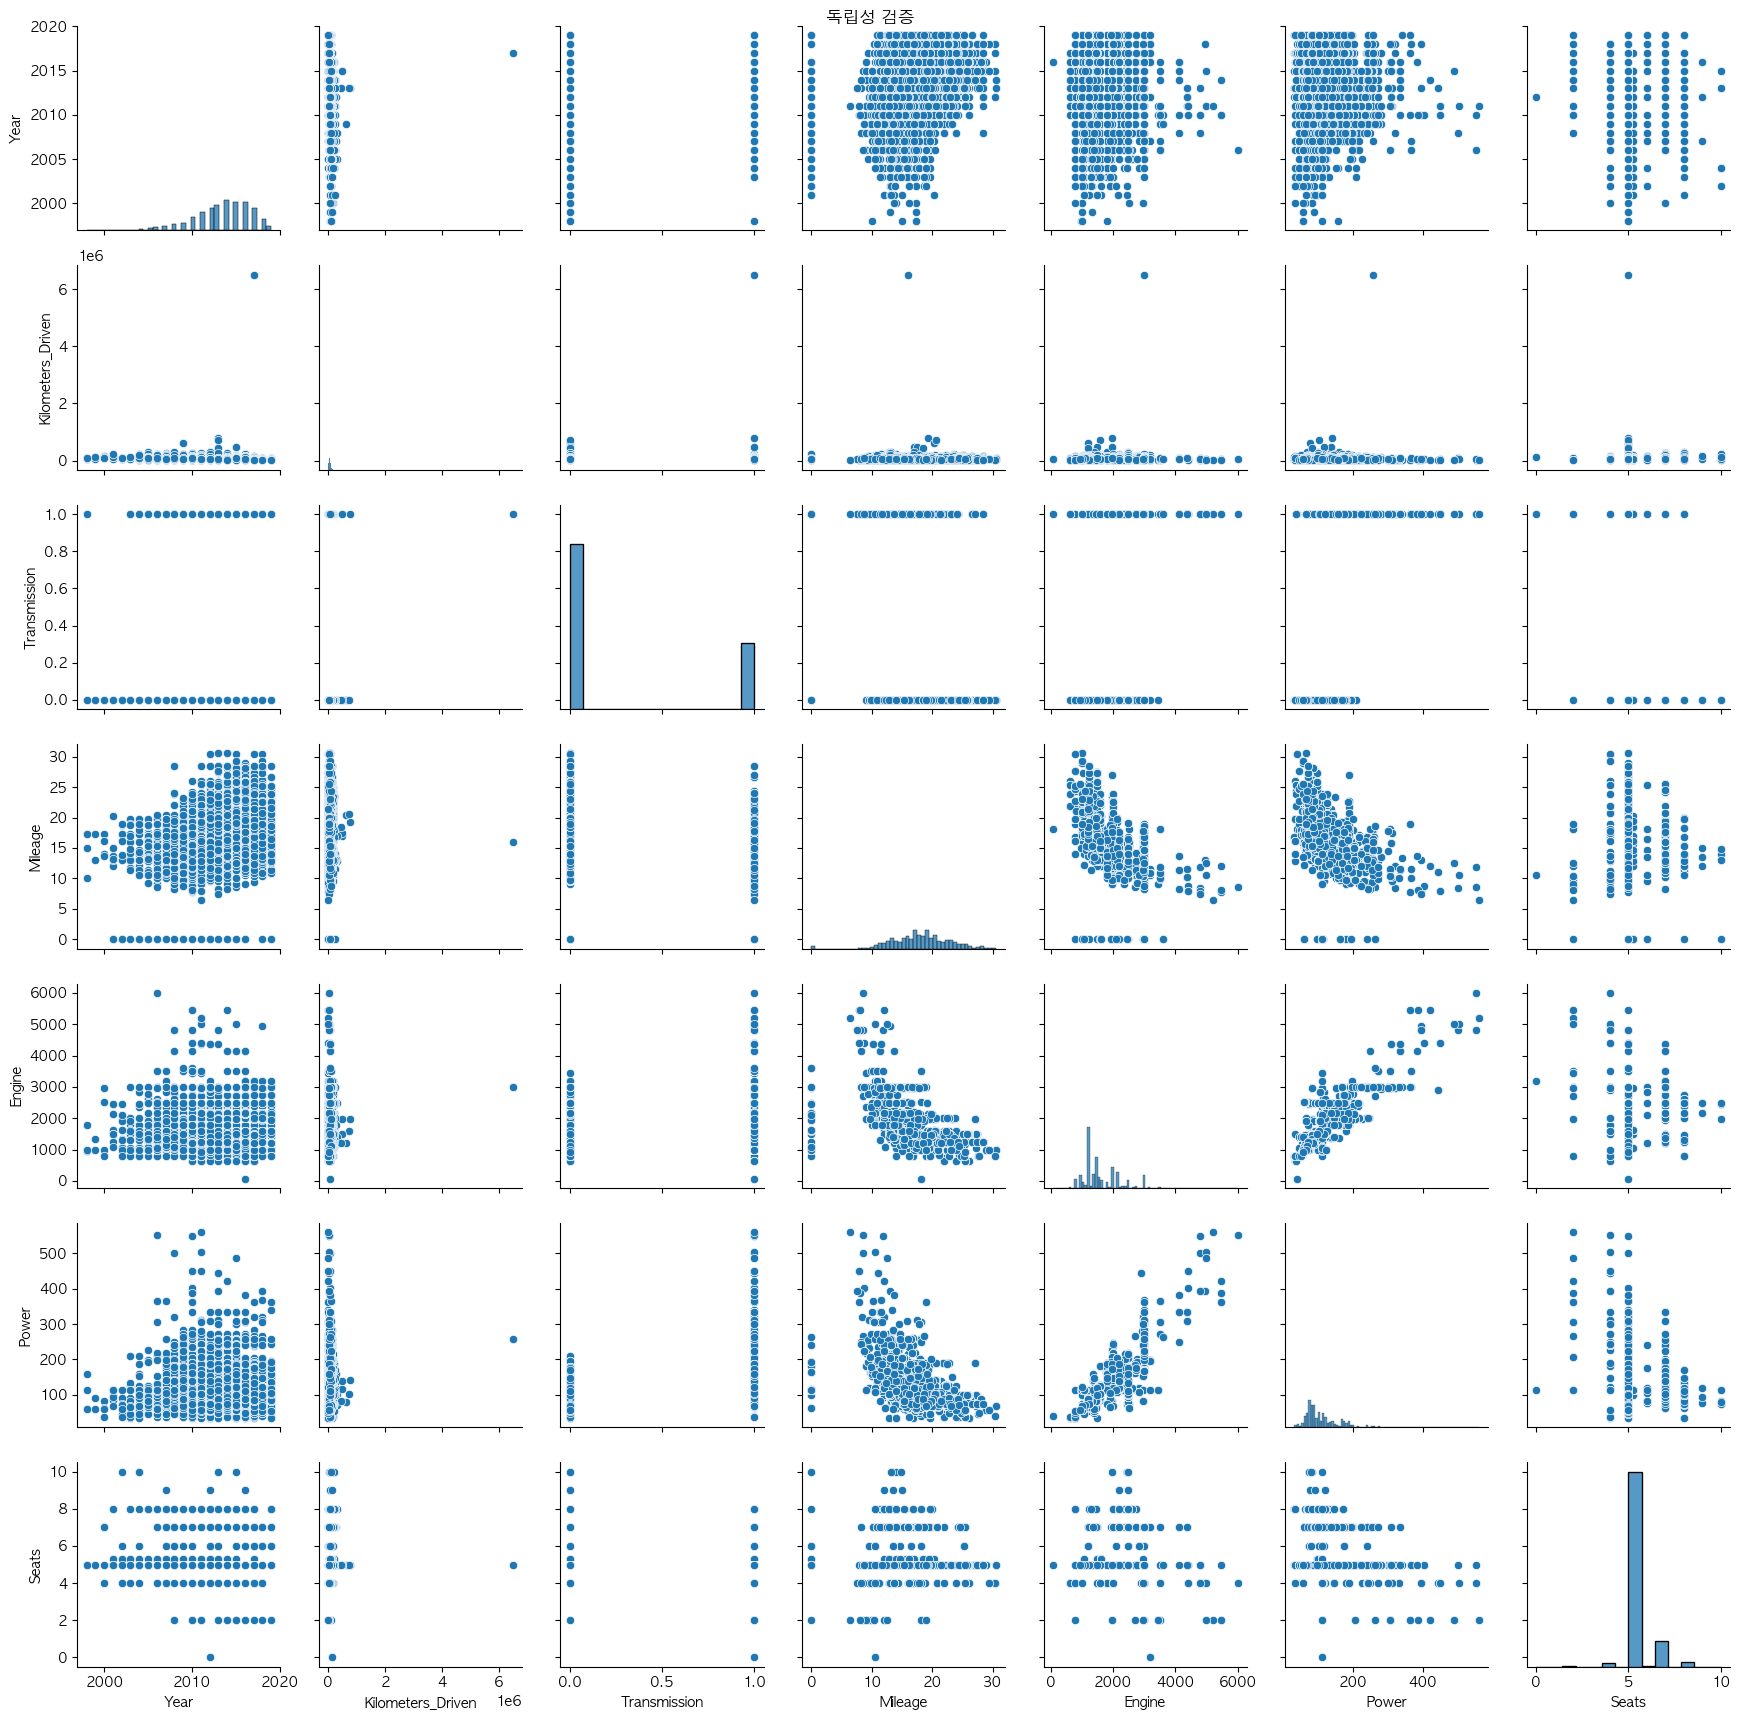

In [15]:
sns.pairplot(X_numeric)
plt.suptitle("독립성 검증")
plt.tight_layout()
plt.show()

- 대부분의 변수가 독립적이다.
  - 하지만 (Power, Engine), (Power, Mileage), (Mileage, Engine)이 상관관계가 있는 것으로 보인다.

In [37]:
ols = sm.OLS(y, X_numeric)
res = ols.fit()

res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Price   R-squared (uncentered):                   0.776
Model:                            OLS   Adj. R-squared (uncentered):              0.776
Method:                 Least Squares   F-statistic:                              2982.
Date:                Sun, 29 Jan 2023   Prob (F-statistic):                        0.00
Time:                        01:53:15   Log-Likelihood:                         -20196.
No. Observations:                6019   AIC:                                  4.041e+04
Df Residuals:                    6012   BIC:                                  4.045e+04
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year                 -0.0077      0.000    -16.246      0.000      -0.009      -0.007
Kilometers_Driven -3.678e-06   9.89e-07     -3.719      0.000   -5.62e-06   -1.74e-06
Transmission          4.2385      0.263     16.125      0.000       3.723       4.754
Mileage               0.3213      0.025     13.019      0.000       0.273       0.370
Engine                0.0020      0.000      5.339      0.000       0.001       0.003
Power                 0.1328      0.004     32.368      0.000       0.125       0.141
Seats                -0.0146      0.142     -0.103      0.918      -0.294       0.265
==============================================================================
Omnibus:                     3890.655   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           230735.835
Skew:                           2.396   Prob(JB):                         0.00
Kurtosis:                      32.951   Cond. No.                     3.20e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""